# <center> StackOverflow my user data

In [2]:
# Imports and settings

import stackexchange
from datetime import datetime
import numpy as np
from os import environ
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Matplotlib settings
% matplotlib inline

rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')       # setting ggplot style

# Key for the application to access the StackOverflow API
key = environ['PYVERFLOW_KEY']

# My user ID
u_id = environ['MY_SO_ID']      # my user ID

### Start the SO querier, get my user

In [3]:
so = stackexchange.Site(stackexchange.StackOverflow, key)

me = so.user(u_id)

### Fetch my data
---

* Reputation changes in time
* Questions in time
* Answers in time
* Usage by tag

In [5]:
# Fetch all rep changes, questions, answers

rc = me.reputation_detail.fetch()
count = len(rc.items)
while True:
    rc = rc.extend_next()
    if len(rc.items) == count:
        break
    count = len(rc.items)

qs = me.questions.fetch()
count = len(qs.items)
while True:
    qs = qs.extend_next()
    if len(qs.items) == count:
        break
    count = len(qs.items)
    
a = me.answers.fetch()
count = len(a.items)
while True:
    a = a.extend_next()
    if len(a.items) == count:
        break
    count = len(a.items)

In [6]:
# Organise rep changes, questions, answers, into sorted-by-date dicts

rc_d = {}
for item in rc:
    rc = item.json['reputation_change']    
    rc_date = datetime.fromtimestamp(item.json['on_date'])
    rc_d[rc_date] = rc
rc_d = OrderedDict(sorted(rc_d.items()))

q_d = {datetime.fromtimestamp(q.json['creation_date']): 0 for q in qs}
for q in qs:    
    q_date = datetime.fromtimestamp(q.json['creation_date'])
    q_d[q_date] += 1
q_d = OrderedDict(sorted(q_d.items()))

a_d = {datetime.fromtimestamp(a.json['creation_date']): 0 for a in a}
for a in a:    
    a_date = datetime.fromtimestamp(a.json['creation_date'])
    a_d[a_date] += 1
a_d = OrderedDict(sorted(a_d.items()))

In [7]:
# Fetch tags

ts = me.tags.fetch()
count = len(ts.items)
while True:
    ts = ts.extend_next()
    if len(ts.items) == count:
        break
    count = len(ts.items)

### Plots 
---
* Cumulative num questions and cumulative reputation in time
* Tag usage (best ones)

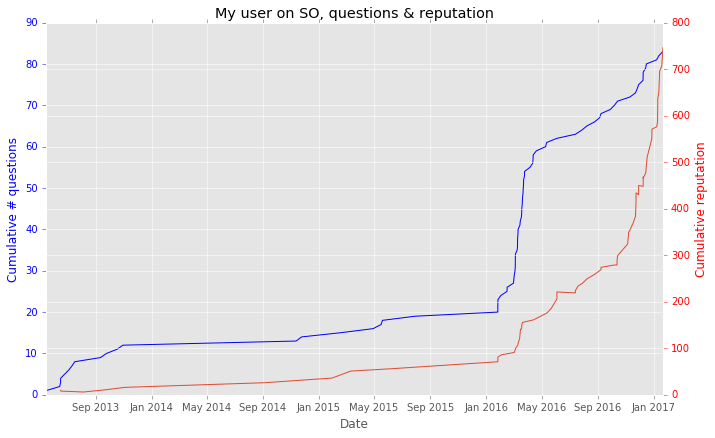

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(q_d.keys(), np.cumsum(q_d.values()), color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative # questions', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(rc_d.keys(), np.cumsum(rc_d.values()))
ax2.set_ylabel('Cumulative reputation', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()

plt.title('My user on SO, questions & reputation')
plt.show()

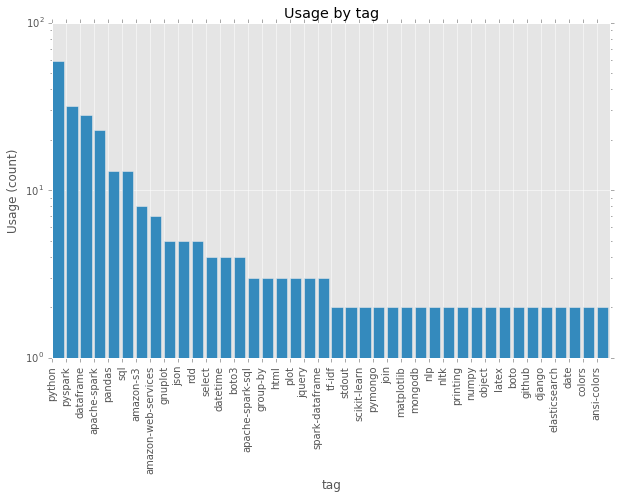

In [9]:
ts_best = [t for t in ts if t.count > 1]

plt.bar([i for i in range(len(ts_best))], [t.count for t in ts_best], log=True)
plt.xticks([i for i in range(len(ts_best))], [t.name for t in ts_best], rotation='vertical')
plt.title('Usage by tag')
plt.xlabel('tag')
plt.ylabel('Usage (count)')

plt.show()